# Jaydeep Patel<br>
**Title:** Color Identification in Images <br>
**Task:** Implement an image color detector which identifies all the colors in an image or video.<br>

**Importing required libraries**

In [1]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd

**Reading and Plotting the image**

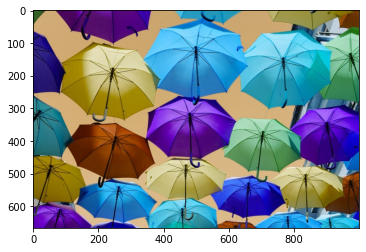

In [2]:
img_path = r'color_image.jpeg'
img = cv2.imread(img_path)
plt.imshow(img)

**Declaring global variables**

In [3]:
clicked = False
r = g = b = x_pos = y_pos = 0

**Reading the csv file**

In [4]:
index = ["color", "color_name", "hex", "R", "G", "B"]
csv = pd.read_csv('colors.csv', names=index, header=None)

**Function to print the color name**

In [5]:
def get_color_name(R, G, B):
    minimum = 10000
    for i in range(len(csv)):
        d = abs(R - int(csv.loc[i, "R"])) + abs(G - int(csv.loc[i, "G"])) + abs(B - int(csv.loc[i, "B"]))
        if d <= minimum:
            minimum = d
            cname = csv.loc[i, "color_name"]
    return cname

**Function to calculate the x,y cordinates**

In [6]:
def draw_function(event, x, y, flags, param):
    if event == cv2.EVENT_MOUSEMOVE:
        global b, g, r, x_pos, y_pos, clicked
        clicked = True
        x_pos = x
        y_pos = y
        b, g, r = img[y, x]
        b = int(b)
        g = int(g)
        r = int(r)

In [7]:
cv2.namedWindow('image')
cv2.setMouseCallback('image', draw_function)

In [8]:
while True:
    cv2.imshow("image", img)
    if clicked:
        cv2.rectangle(img, (20, 20), (750, 60), (b, g, r), -1)
        text = get_color_name(r, g, b) + ' R=' + str(r) + ' G=' + str(g) + ' B=' + str(b)
        cv2.putText(img, text, (50, 50), 2, 0.8, (255, 255, 255), 2, cv2.LINE_AA)
        if r + g + b >= 600:
            cv2.putText(img, text, (50, 50), 2, 0.8, (0, 0, 0), 2, cv2.LINE_AA)
        clicked = False
    if cv2.waitKey(20) & 0xFF == 27:
        break
cv2.destroyAllWindows()